# Introduction to PyTorch

In [ ]:
# Example of PyTorch library
import torch
print(f'PyTorch version: {torch.__version__}')

print(f'Cuda is available: {torch.cuda.is_available()}')
print(f'MPS is available: {torch.backends.mps.is_available()}')


PyTorch version: 2.1.0+cu121
Cuda is available: True
MPS is available: False


In [ ]:
# declare two symbolic floating-point scalars
a = torch.tensor(1.5)
b = torch.tensor(2.5)

# create a simple symbolic expression using the add function
c = torch.add(a, b)
print(c)

tensor(4.)


Creating a tensor from a List

In [ ]:
a = torch.FloatTensor([1,2,3,4])
b = torch.FloatTensor([2,3,4,5])

c = a+b
print(c)

tensor([3., 5., 7., 9.])


Creating a tensor from a list of lists

In [ ]:
a = torch.FloatTensor([[1,2],[3,4]])
b = torch.FloatTensor([[2,3],[4,5]])

c = a+b
print(c)

tensor([[3., 5.],
        [7., 9.]])


In [ ]:
import numpy as np

np_a = np.array([[1,2],[3,4]])
np_b = np.array([[2,3],[4,5]])

a = torch.FloatTensor(np_a)
b = torch.FloatTensor(np_b)

c= a+b
print(c)

tensor([[3., 5.],
        [7., 9.]])


In [ ]:
c=a*b
print(c)

tensor([[ 2.,  6.],
        [12., 20.]])


In [ ]:
c=a@b
print(c)

tensor([[10., 13.],
        [22., 29.]])


In [ ]:
c = a.sin()
print(c)

c = b.clone()
c.sin_()

print(a)
print(b)
print(c)

tensor([[ 0.8415,  0.9093],
        [ 0.1411, -0.7568]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 3.],
        [4., 5.]])
tensor([[ 0.9093,  0.1411],
        [-0.7568, -0.9589]])


In [ ]:
b = a.unsqueeze(dim=0)
print(b)
print(b.shape)

c = a.unsqueeze(dim=1)
print(c)
print(c.shape)

d = a.unsqueeze(dim=2)
print(d)
print(d.shape)

tensor([[[1., 2.],
         [3., 4.]]])
torch.Size([1, 2, 2])
tensor([[[1., 2.]],

        [[3., 4.]]])
torch.Size([2, 1, 2])
tensor([[[1.],
         [2.]],

        [[3.],
         [4.]]])
torch.Size([2, 2, 1])


In [ ]:
f = b.squeeze()
print(f)

tensor([[1., 2.],
        [3., 4.]])


## Statistical Distributions

In [ ]:
from torch.distributions.categorical import Categorical

In [ ]:
# Suppose that we have a distribution like the following:
probs=torch.FloatTensor([0.4, 0.4, 0.15, 0.05])

# We can create a distribution based on this values
dist = Categorical(probs=probs)
print(dist)

Categorical(probs: torch.Size([4]))


In [ ]:
# We can calculate probabilities for each category:
print(f'Probability distribution: {dist.probs}')

Probability distribution: tensor([0.4000, 0.4000, 0.1500, 0.0500])


In [ ]:
# We can calculate log-probabilities for a certain value:
# - 0 means that a value is certain
# - very low negative values mean that this value is very unexpected
print(f'log(prob(0)): {dist.log_prob(torch.FloatTensor([0]))}')
print(f'log(prob(3)): {dist.log_prob(torch.FloatTensor([3]))}')

log(prob(0)): tensor([-0.9163])
log(prob(3)): tensor([-2.9957])


In [ ]:
# We can also sample entries according to the underlying probability
print(dist.sample())
print(dist.sample())
print(dist.sample())
print(dist.sample())

tensor(2)
tensor(1)
tensor(2)
tensor(2)


In [ ]:
# We can calculate the entropy of an entry as:
entropy = -dist.log_prob(torch.FloatTensor([0]))*dist.probs[0]
print(entropy)

tensor([0.3665])


In [ ]:
# Similarly we can work with other distributions including continuous distributions
# such as the normal distribution
from torch.distributions.normal import Normal
dist = Normal(torch.tensor([1.7]), torch.tensor([0.3]))

# let's see the probability of having
sample = torch.FloatTensor([1.7])#dist.sample()
log_prob = dist.log_prob(sample)
prob = torch.exp(log_prob)

print(f'Value: {sample.item()}: log(prob): {log_prob.item()}, prob: {prob.item()}, entropy: {(-log_prob*prob).item()}')

Value: 1.7000000476837158: log(prob): 0.28503429889678955, prob: 1.3298076391220093, entropy: -0.37904077768325806


### Logits

A typical representation of probability distributions in tensor libraries such as PyTorch are logits. Logits is a function that maps probabilities from the range [0, 1] to real numbers:

$$L=\ln \frac{p}{(1-p)}$$

$$p= \dfrac{1}{(1+e^{-L})}$$

In [ ]:
dist1 = Categorical(probs=torch.FloatTensor([0.3, 0.4, 0.2, 0.1]))
dist2 = Categorical(logits=torch.FloatTensor([-0.8473,-0.4055,-1.3863,-2.196]))
print(dist1.log_prob(torch.arange(4)))
print(dist2.log_prob(torch.arange(4)))


tensor([-1.2040, -0.9163, -1.6094, -2.3026])
tensor([-1.2233, -0.7815, -1.7623, -2.5720])


### Comparing two distributions

In some cases we want to compare how close or far are two distributions (e.g. because we want to converge to a given value). The KL divergence (Kullback-Leibler divergence) allows us to do such comparison. Its value is 0 for two distributions that are equal.

For discrete distributions: $$D_{KL}(P||Q)=\sum_{x \in X} P(x)\ln\dfrac{P(x)}{Q(x)} = \sum_{x \in X} P(x)(\ln(P(x))-\ln(Q(x)))$$

In [ ]:
def kl(dist1, dist2):
    size1 = len(dist1.probs)
    size2 = len(dist2.probs)

    assert size1 == size2

    x = torch.arange(size1)

    return (dist1.probs*(dist1.log_prob(x)-dist2.log_prob(x))).sum()

In [ ]:
kl_div = kl(dist1, dist2)
print(kl_div)

tensor(0.0094)


In [ ]:
dist3 = Categorical(probs=torch.FloatTensor([9.0/25.0, 12.0/25.0, 4.0/25.0]))
dist4 = Categorical(probs=torch.FloatTensor([1.0/3.0, 1.0/3.0, 1.0/3.0]))

print(kl(dist3, dist4))
print(kl(dist4, dist3))

tensor(0.0853)
tensor(0.0975)


## Moving a tensor to a device

Pytorch enables a simple approach to handling the location of a tensor. Note that to perform a certain computation the participating tensors must be on the same device.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cuda


In [ ]:
a = a.to(device)
b = b.to(device)

c = a+b

print(c)
print(c.cpu())
print(c.cpu().numpy())

tensor([[[2., 4.],
         [6., 8.]]], device='cuda:0')
tensor([[[2., 4.],
         [6., 8.]]])
[[[2. 4.]
  [6. 8.]]]


## Gradients

One of the main capabilities of PyTorch is the possibility of computing the gradients of an expresion automatically.

In [ ]:
a = torch.FloatTensor([1,2,3,4])
b = torch.FloatTensor([2,3,4,5])
x = torch.tensor([2,3,4,5], dtype=torch.float32, requires_grad = True)

exp = (a*x+b).sum()
exp.backward()

print(x.grad)
x.grad.zero_()

tensor([1., 2., 3., 4.])


tensor([0., 0., 0., 0.])

In [ ]:
exp = (a*(x*x)+b).sum() # exp' = 2*a*x
exp.backward()

print(x.grad)
x.grad.zero_()

tensor([ 4., 12., 24., 40.])


tensor([0., 0., 0., 0.])

## Modules

In [ ]:
import torch.nn as nn

In [ ]:
x = torch.FloatTensor([1,2,3,4])
model = nn.Linear(4,1)

y = model(x)

print(y)

tensor([-1.7287], grad_fn=<ViewBackward0>)


In [ ]:
print(model)
print(y.item())

Linear(in_features=4, out_features=1, bias=True)
-1.7287168502807617


In [ ]:
model = nn.Sequential(*[
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4,1)
])

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
y = model(x)
print(y)

tensor([0.3165], grad_fn=<ViewBackward0>)


One important aspect of models in PyTorch is that they are vectorial by default. If we pass multiple values of the correct shape (a.k.a a batch) we will receive an output for each entry.

In [ ]:
x = torch.FloatTensor([[1,2,3,4], [2,3,4,5]])
y= model(x)
print(y)

tensor([[0.3165],
        [0.5512]], grad_fn=<AddmmBackward0>)


## Learning a function

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate angles between 0 and 2*pi
angles = np.random.uniform(low=0, high=2*np.pi, size=(1000,))

# Generate sin values for the angles
sin_values = np.sin(angles)

# Convert the data to PyTorch tensors
inputs = torch.from_numpy(angles).float().unsqueeze(1)
targets = torch.from_numpy(sin_values).float().unsqueeze(1)

In [ ]:
# Define the sequential model
model = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

In [ ]:
import torch.optim as optim

def train(model):
    # Define the loss function
    loss_fn = nn.MSELoss()

    # Define the optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Set the number of training epochs
    num_epochs = 10000

    # Training loop
    for epoch in range(num_epochs):
        # Missing select some inputs for this batch
        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print the loss every 100 epochs
        if (epoch+1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

train(model)

Epoch [1000/10000], Loss: 0.11687320470809937
Epoch [2000/10000], Loss: 0.07925041019916534
Epoch [3000/10000], Loss: 0.04696273431181908
Epoch [4000/10000], Loss: 0.025985054671764374
Epoch [5000/10000], Loss: 0.014120331965386868
Epoch [6000/10000], Loss: 0.008354195393621922
Epoch [7000/10000], Loss: 0.021714890375733376
Epoch [8000/10000], Loss: 0.017901334911584854
Epoch [9000/10000], Loss: 0.005541832651942968
Epoch [10000/10000], Loss: 0.006007513031363487


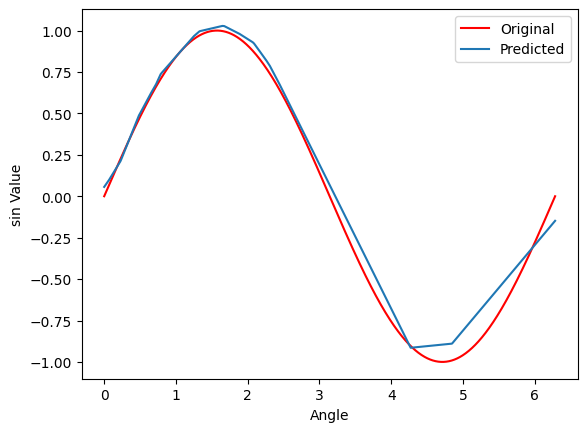

In [ ]:
import matplotlib.pyplot as plt

def test_model(model):
    # Set the model to evaluation mode
    model.eval()

    # Generate angles for testing
    test_angles = torch.linspace(0, 2*np.pi, 1000).unsqueeze(1)

    # Forward pass on test angles
    with torch.no_grad():
        predicted_sin = model(test_angles)
        true_sin = np.sin(test_angles)

    # Convert tensors to numpy arrays
    test_angles = test_angles.numpy()
    predicted_sin = predicted_sin.numpy()

    # Plot the results
    plt.plot(test_angles, true_sin, 'r', label='Original')
    plt.plot(test_angles, predicted_sin, label='Predicted')
    plt.xlabel('Angle')
    plt.ylabel('sin Value')
    plt.legend()
    plt.show()

test_model(model)

### Class-based approach to defining a model

In [ ]:
class Sin_nn(nn.Module):
    def __init__(self):
        super(Sin_nn, self).__init__()
        self.fc1 = nn.Linear(1,16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32,1)

    #This must be implemented
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        return self.fc3(x)

In [ ]:
model2 = Sin_nn()
train(model2)

Epoch [1000/10000], Loss: 0.09086665511131287
Epoch [2000/10000], Loss: 0.04947183281183243
Epoch [3000/10000], Loss: 0.028421947732567787
Epoch [4000/10000], Loss: 0.01582435332238674
Epoch [5000/10000], Loss: 0.008870779536664486
Epoch [6000/10000], Loss: 0.005170691292732954
Epoch [7000/10000], Loss: 0.003178768092766404
Epoch [8000/10000], Loss: 0.00885543879121542
Epoch [9000/10000], Loss: 0.0034346492029726505
Epoch [10000/10000], Loss: 0.0023119072429835796


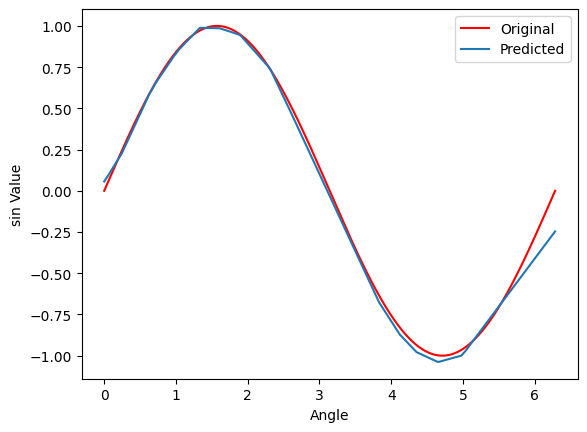

In [ ]:
test_model(model2)

# Exercise



## Tan Function


In [ ]:
class Tan_nn(nn.Module):
    def __init__(self):
        super(Tan_nn, self).__init__()  # This line remains the same
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)  # Change ReLU to Tanh
        x = self.fc2(x)
        x = torch.tanh(x)  # Change ReLU to Tanh
        return self.fc3(x)

In [ ]:
model3 = Tan_nn()
train(model3)

Epoch [1000/10000], Loss: 0.07304662466049194
Epoch [2000/10000], Loss: 0.05701719596982002
Epoch [3000/10000], Loss: 0.05138462781906128
Epoch [4000/10000], Loss: 0.044464360922575
Epoch [5000/10000], Loss: 0.038477424532175064
Epoch [6000/10000], Loss: 0.03237142413854599
Epoch [7000/10000], Loss: 0.02608524262905121
Epoch [8000/10000], Loss: 0.019992120563983917
Epoch [9000/10000], Loss: 0.01463365275412798
Epoch [10000/10000], Loss: 0.01035701297223568


## Tan Test

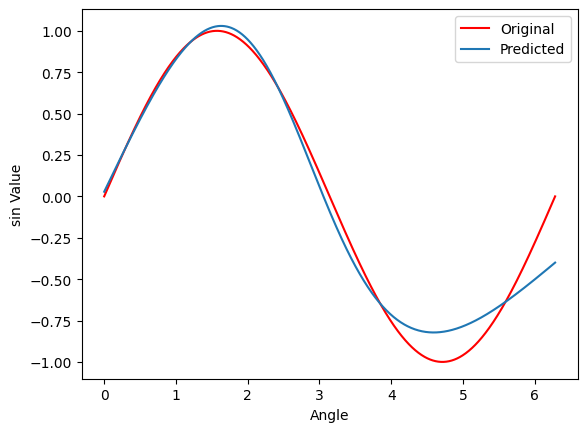

In [ ]:
test_model(model3)

## Sigmoid Function

In [ ]:
class Sigmoid_nn(nn.Module):
    def __init__(self):
        super(Sigmoid_nn, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)  # Change Tanh to Sigmoid
        x = self.fc2(x)
        x = torch.sigmoid(x)  # Change Tanh to Sigmoid
        return self.fc3(x)

In [ ]:
model4 = Sigmoid_nn()
train(model4)

Epoch [1000/10000], Loss: 0.26596882939338684
Epoch [2000/10000], Loss: 0.19288331270217896
Epoch [3000/10000], Loss: 0.18215066194534302
Epoch [4000/10000], Loss: 0.1761947125196457
Epoch [5000/10000], Loss: 0.17143194377422333
Epoch [6000/10000], Loss: 0.16686893999576569
Epoch [7000/10000], Loss: 0.16206952929496765
Epoch [8000/10000], Loss: 0.15677526593208313
Epoch [9000/10000], Loss: 0.15079163014888763
Epoch [10000/10000], Loss: 0.1439526528120041


## Sigmoid Test

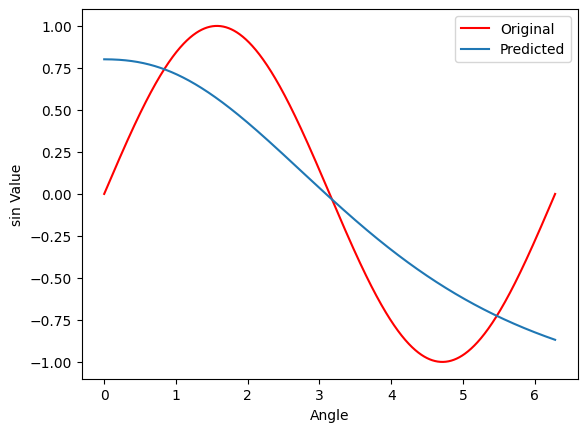

In [ ]:
test_model(model4)

## Conclusion


Tanh Model:
The tanh activation function compresses output values to the range (-1, 1). This means the model's output will be scaled between -1 and 1. Since the sine function has values in the range [-1, 1], the tanh activation captures the general shape of the sine function. However, the scaling might affect accuracy, which is why the model faces some difficulties approximating reality at the end.

Sigmoid Model:
The sigmoid activation function compresses output values to the range (0, 1) and acts as a soft approximation. This means the model's output will be scaled between 0 and 1. Since the sine function has both positive and negative values, oscillating between -1 and 1, using the sigmoid activation limits the model's ability to accurately capture both peaks and closely follow the sine function, instead making a rough approximation that stays above zero.